In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind, f, chi2
from itertools import combinations
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

plt.style.use('seaborn-v0_8')
sns.set_palette("Set1")

# Preprocess

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Stats

In [3]:
statistics = pd.Series(dtype='object')
statistics['Shape'] = df.shape
statistics['Features'] = df.shape[1]
statistics['Classes'] = df['species'].nunique()
statistics['Num of samples'] = tuple(df['species'].value_counts().sort_index())
statistics['Class distribution'] = df['species'].value_counts().to_dict()
statistics['Missing data percentage'] = (df.isnull().any(axis=1).sum() / len(df)) * 100

print("Статистика датасета:")
print(statistics)
print("\nОсновные статистики числовых признаков:")
print(df.describe())

Статистика датасета:
Shape                                                             (344, 7)
Features                                                                 7
Classes                                                                  3
Num of samples                                              (152, 68, 124)
Class distribution         {'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68}
Missing data percentage                                           3.197674
dtype: object

Основные статистики числовых признаков:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  405

# Visuals

Размер отфильтрованного датасета: (342, 5)


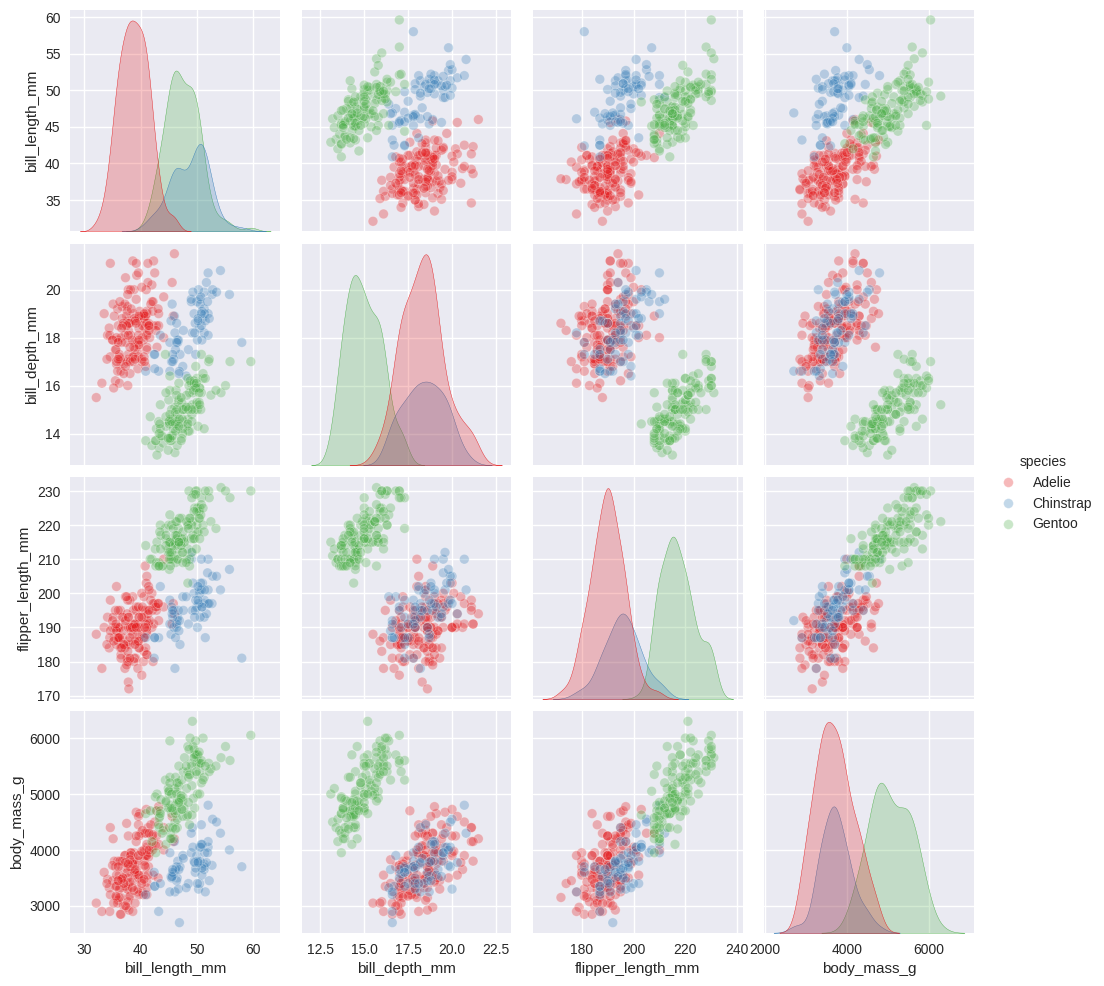

In [4]:
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
selected_species = ['Adelie', 'Chinstrap', 'Gentoo']

df_subset = df[['species'] + selected_features]

df_subset = df_subset.dropna(subset=selected_features)

print("Размер отфильтрованного датасета:", df_subset.shape)

sns.pairplot(
    data=df_subset,
    vars=selected_features,
    hue='species',
    plot_kws={'alpha': 0.3},
    diag_kind='kde',     
)

plt.show()


# 4 Spearman + Pearson


P-значения Пирсона (всё множество):
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm            0.00000        0.00001                0.0   
bill_depth_mm             0.00001        0.00000                0.0   
flipper_length_mm         0.00000        0.00000                0.0   
body_mass_g               0.00000        0.00000                0.0   

                   body_mass_g  
bill_length_mm             0.0  
bill_depth_mm              0.0  
flipper_length_mm          0.0  
body_mass_g                0.0  

P-значения Спирмана (всё множество):
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm            0.00000        0.00004                0.0   
bill_depth_mm             0.00004        0.00000                0.0   
flipper_length_mm         0.00000        0.00000                0.0   
body_mass_g               0.00000        0.00000                0.0   

                   body_mass_g  
bill_length_mm 

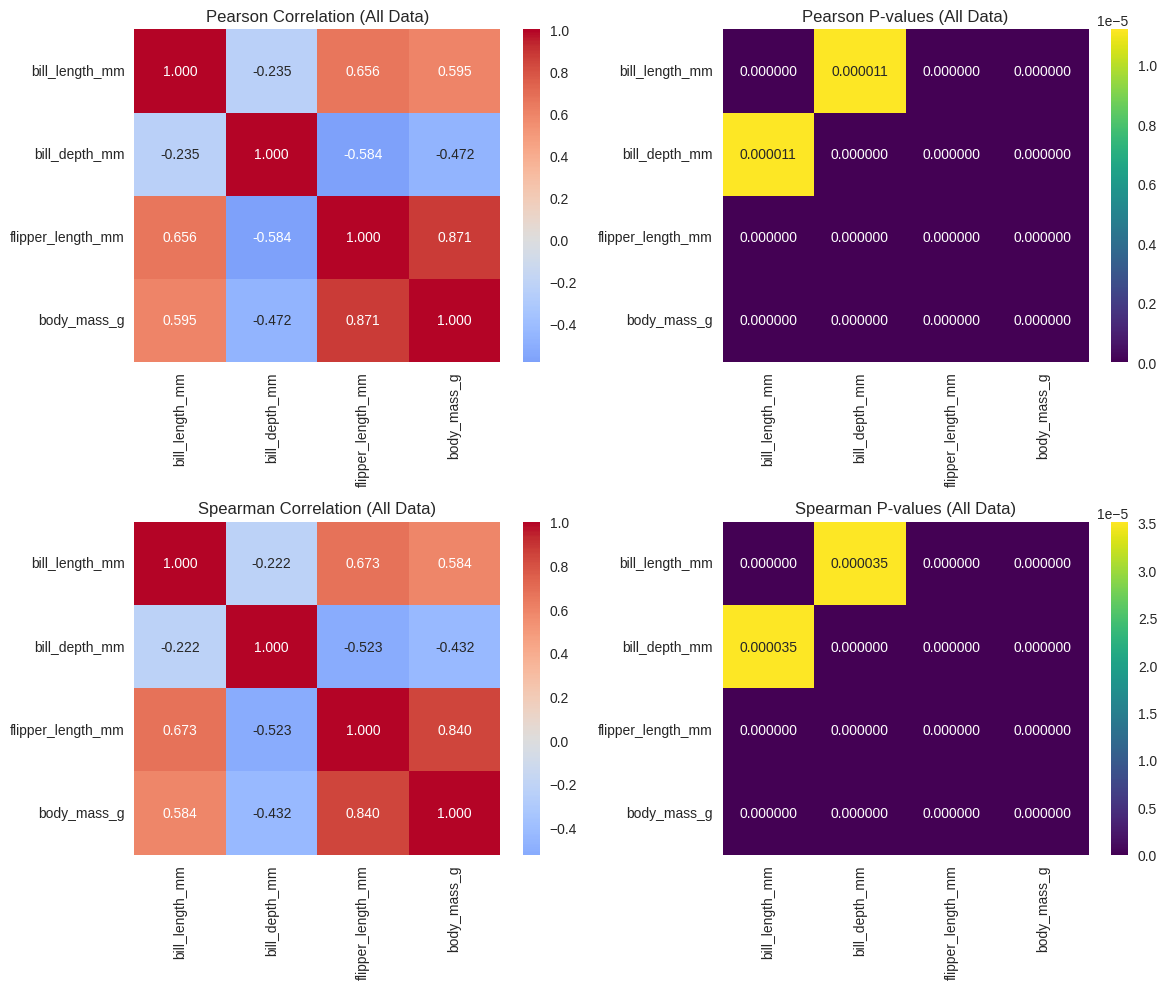


--- Adelie ---
P-значения Пирсона для Adelie:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           0.000000       0.000001           0.000045   
bill_depth_mm            0.000001       0.000000           0.000122   
flipper_length_mm        0.000045       0.000122           0.000000   
body_mass_g              0.000000       0.000000           0.000000   

                   body_mass_g  
bill_length_mm             0.0  
bill_depth_mm              0.0  
flipper_length_mm          0.0  
body_mass_g                0.0  
P-значения Спирмана для Adelie:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           0.000000       0.000005           0.000020   
bill_depth_mm            0.000005       0.000000           0.000045   
flipper_length_mm        0.000020       0.000045           0.000000   
body_mass_g              0.000000       0.000000           0.000000   

                   body_mass_g  
bill_length

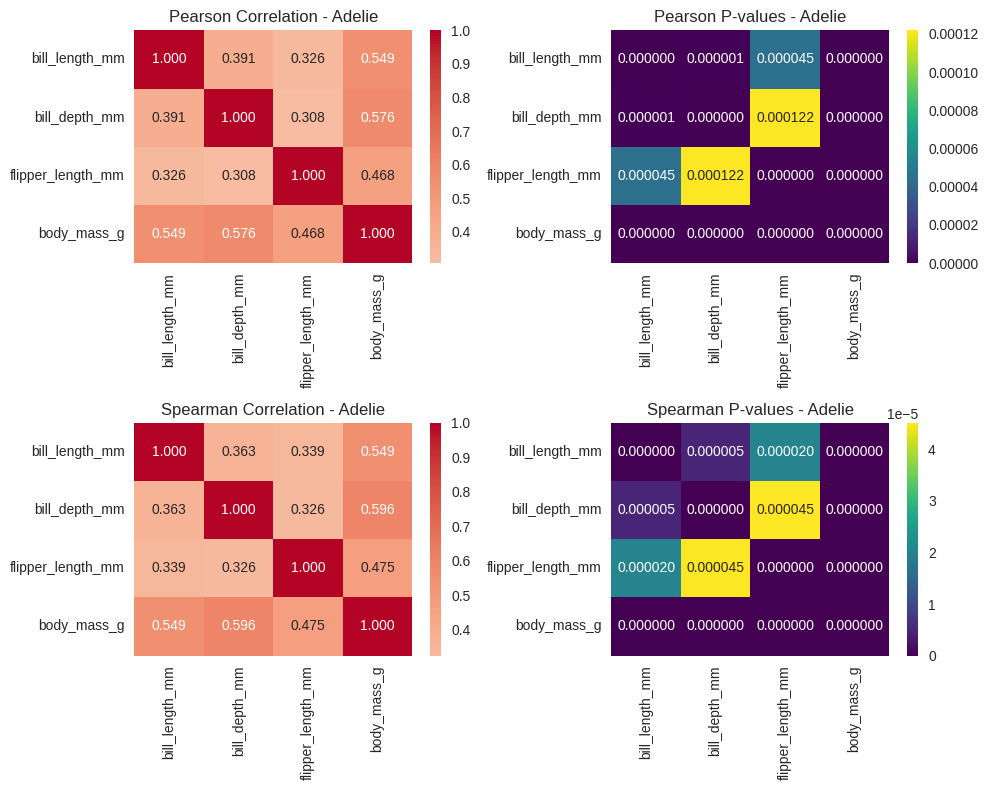


--- Chinstrap ---
P-значения Пирсона для Chinstrap:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           0.000000            0.0           0.000049   
bill_depth_mm            0.000000            0.0           0.000000   
flipper_length_mm        0.000049            0.0           0.000000   
body_mass_g              0.000007            0.0           0.000000   

                   body_mass_g  
bill_length_mm        0.000007  
bill_depth_mm         0.000000  
flipper_length_mm     0.000000  
body_mass_g           0.000000  
P-значения Спирмана для Chinstrap:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           0.000000            0.0           0.000003   
bill_depth_mm            0.000000            0.0           0.000000   
flipper_length_mm        0.000003            0.0           0.000000   
body_mass_g              0.000004            0.0           0.000000   

                   body_mass_g  
bi

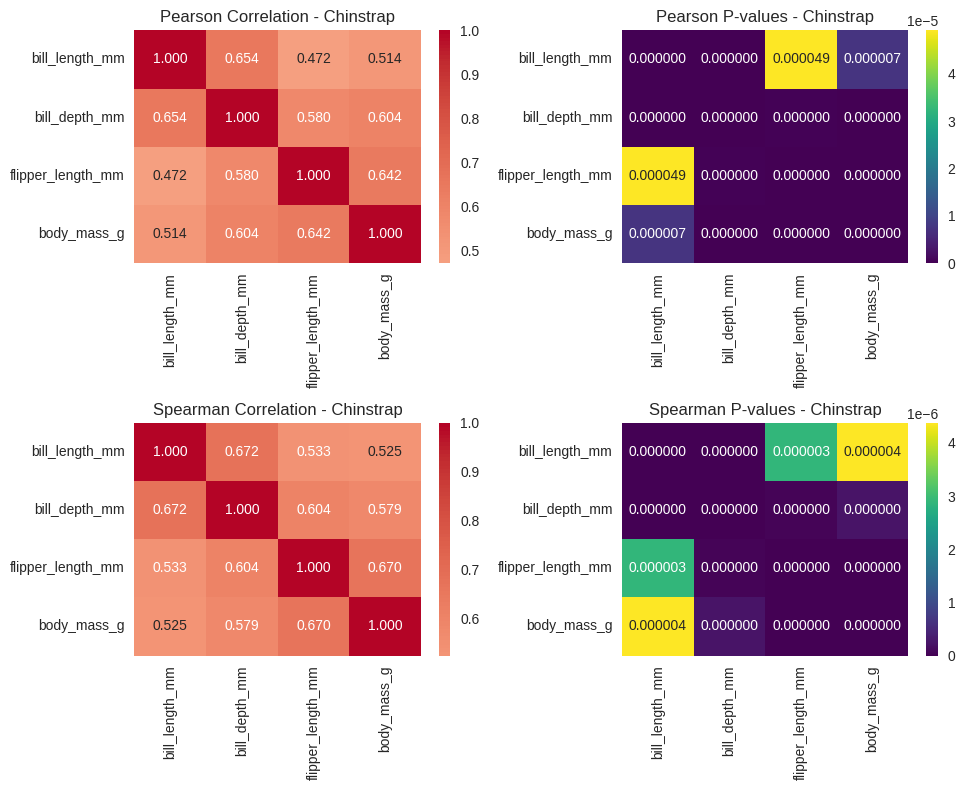


--- Gentoo ---
P-значения Пирсона для Gentoo:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm                0.0            0.0                0.0   
bill_depth_mm                 0.0            0.0                0.0   
flipper_length_mm             0.0            0.0                0.0   
body_mass_g                   0.0            0.0                0.0   

                   body_mass_g  
bill_length_mm             0.0  
bill_depth_mm              0.0  
flipper_length_mm          0.0  
body_mass_g                0.0  
P-значения Спирмана для Gentoo:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm                0.0            0.0                0.0   
bill_depth_mm                 0.0            0.0                0.0   
flipper_length_mm             0.0            0.0                0.0   
body_mass_g                   0.0            0.0                0.0   

                   body_mass_g  
bill_length

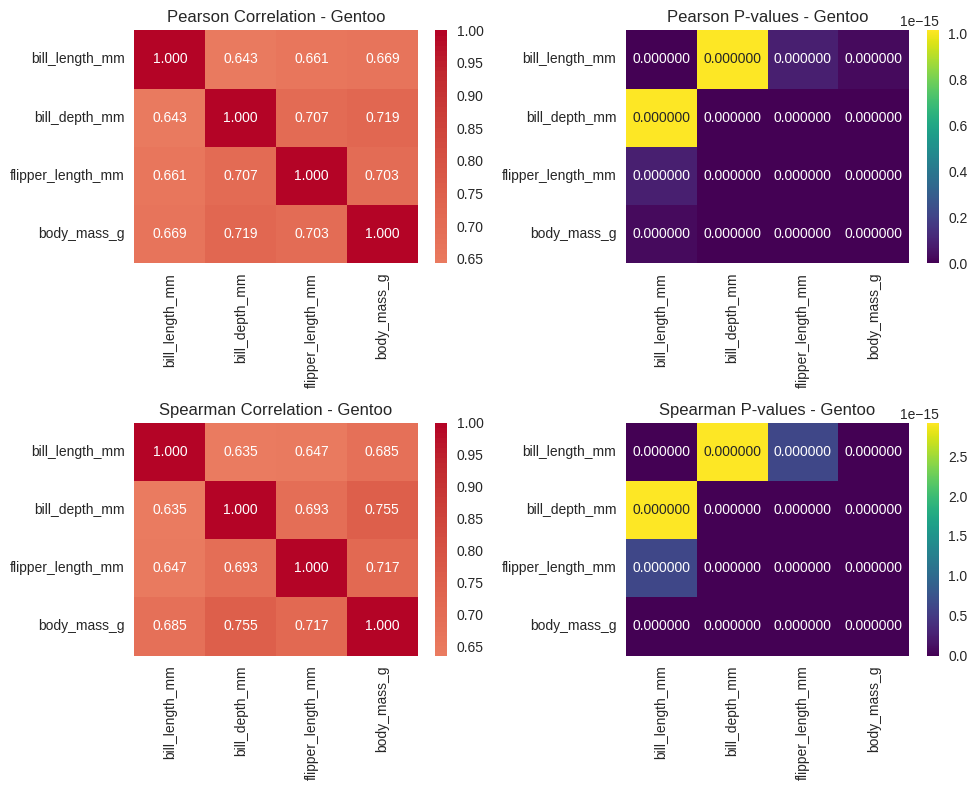

In [20]:
def correlation_matrix_with_pvalues(df, method='pearson'):
    cols = df.columns
    corrs = np.zeros((len(cols), len(cols)))
    p_vals = np.zeros((len(cols), len(cols)))

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i == j:
                corrs[i, j] = 1.0
                p_vals[i, j] = 0.0
            else:
                if method == 'pearson':
                    r, p = pearsonr(df.iloc[:, i], df.iloc[:, j])
                elif method == 'spearman':
                    r, p = spearmanr(df.iloc[:, i], df.iloc[:, j])
                corrs[i, j] = r
                p_vals[i, j] = p

    corr_df = pd.DataFrame(corrs, index=cols, columns=cols)
    p_df = pd.DataFrame(p_vals, index=cols, columns=cols)
    return corr_df, p_df

def correlation_analysis(df, features, classes, plot_all=True, plot_by_class=True):

    numeric_df = df[features]

    # Для всего датасета
    pearson_corr, pearson_p = correlation_matrix_with_pvalues(numeric_df, method='pearson')
    spearman_corr, spearman_p = correlation_matrix_with_pvalues(numeric_df, method='spearman')

    print("\nP-значения Пирсона (всё множество):")
    print(pearson_p.round(5))

    print("\nP-значения Спирмана (всё множество):")
    print(spearman_p.round(5))

    # Тепловые карты для всего датасета
    if plot_all:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        sns.heatmap(pearson_corr, annot=True, fmt='.3f', ax=axes[0,0], cmap='coolwarm', center=0)
        axes[0,0].set_title('Pearson Correlation (All Data)')

        sns.heatmap(pearson_p, annot=True, fmt='.6f', ax=axes[0,1], cmap='viridis')
        axes[0,1].set_title('Pearson P-values (All Data)')

        sns.heatmap(spearman_corr, annot=True, fmt='.3f', ax=axes[1,0], cmap='coolwarm', center=0)
        axes[1,0].set_title('Spearman Correlation (All Data)')

        sns.heatmap(spearman_p, annot=True, fmt='.6f', ax=axes[1,1], cmap='viridis')
        axes[1,1].set_title('Spearman P-values (All Data)')

        plt.tight_layout()
        plt.show()

    # Для каждого класса отдельно
    for species in classes:
        subset = df[df['species'] == species][features]
        if subset.empty:
            print(f"\n--- {species}: Нет данных ---")
            continue

        pearson_corr_s, pearson_p_s = correlation_matrix_with_pvalues(subset, method='pearson')
        spearman_corr_s, spearman_p_s = correlation_matrix_with_pvalues(subset, method='spearman')

        print(f"\n--- {species} ---")

        print(f"P-значения Пирсона для {species}:")
        print(pearson_p_s.round(6))

        print(f"P-значения Спирмана для {species}:")
        print(spearman_p_s.round(6))

        # Тепловые карты для каждого класса (Пирсон + Спирман)
        if plot_by_class:
            fig, axes = plt.subplots(2, 2, figsize=(10, 8))

            sns.heatmap(pearson_corr_s, annot=True, fmt='.3f', ax=axes[0,0], cmap='coolwarm', center=0)
            axes[0,0].set_title(f'Pearson Correlation - {species}')

            sns.heatmap(pearson_p_s, annot=True, fmt='.6f', ax=axes[0,1], cmap='viridis')
            axes[0,1].set_title(f'Pearson P-values - {species}')

            sns.heatmap(spearman_corr_s, annot=True, fmt='.3f', ax=axes[1,0], cmap='coolwarm', center=0)
            axes[1,0].set_title(f'Spearman Correlation - {species}')

            sns.heatmap(spearman_p_s, annot=True, fmt='.6f', ax=axes[1,1], cmap='viridis')
            axes[1,1].set_title(f'Spearman P-values - {species}')

            plt.tight_layout()
            plt.show()

    return
    
results = correlation_analysis(df_subset, selected_features, selected_species)

# 5 LinReg

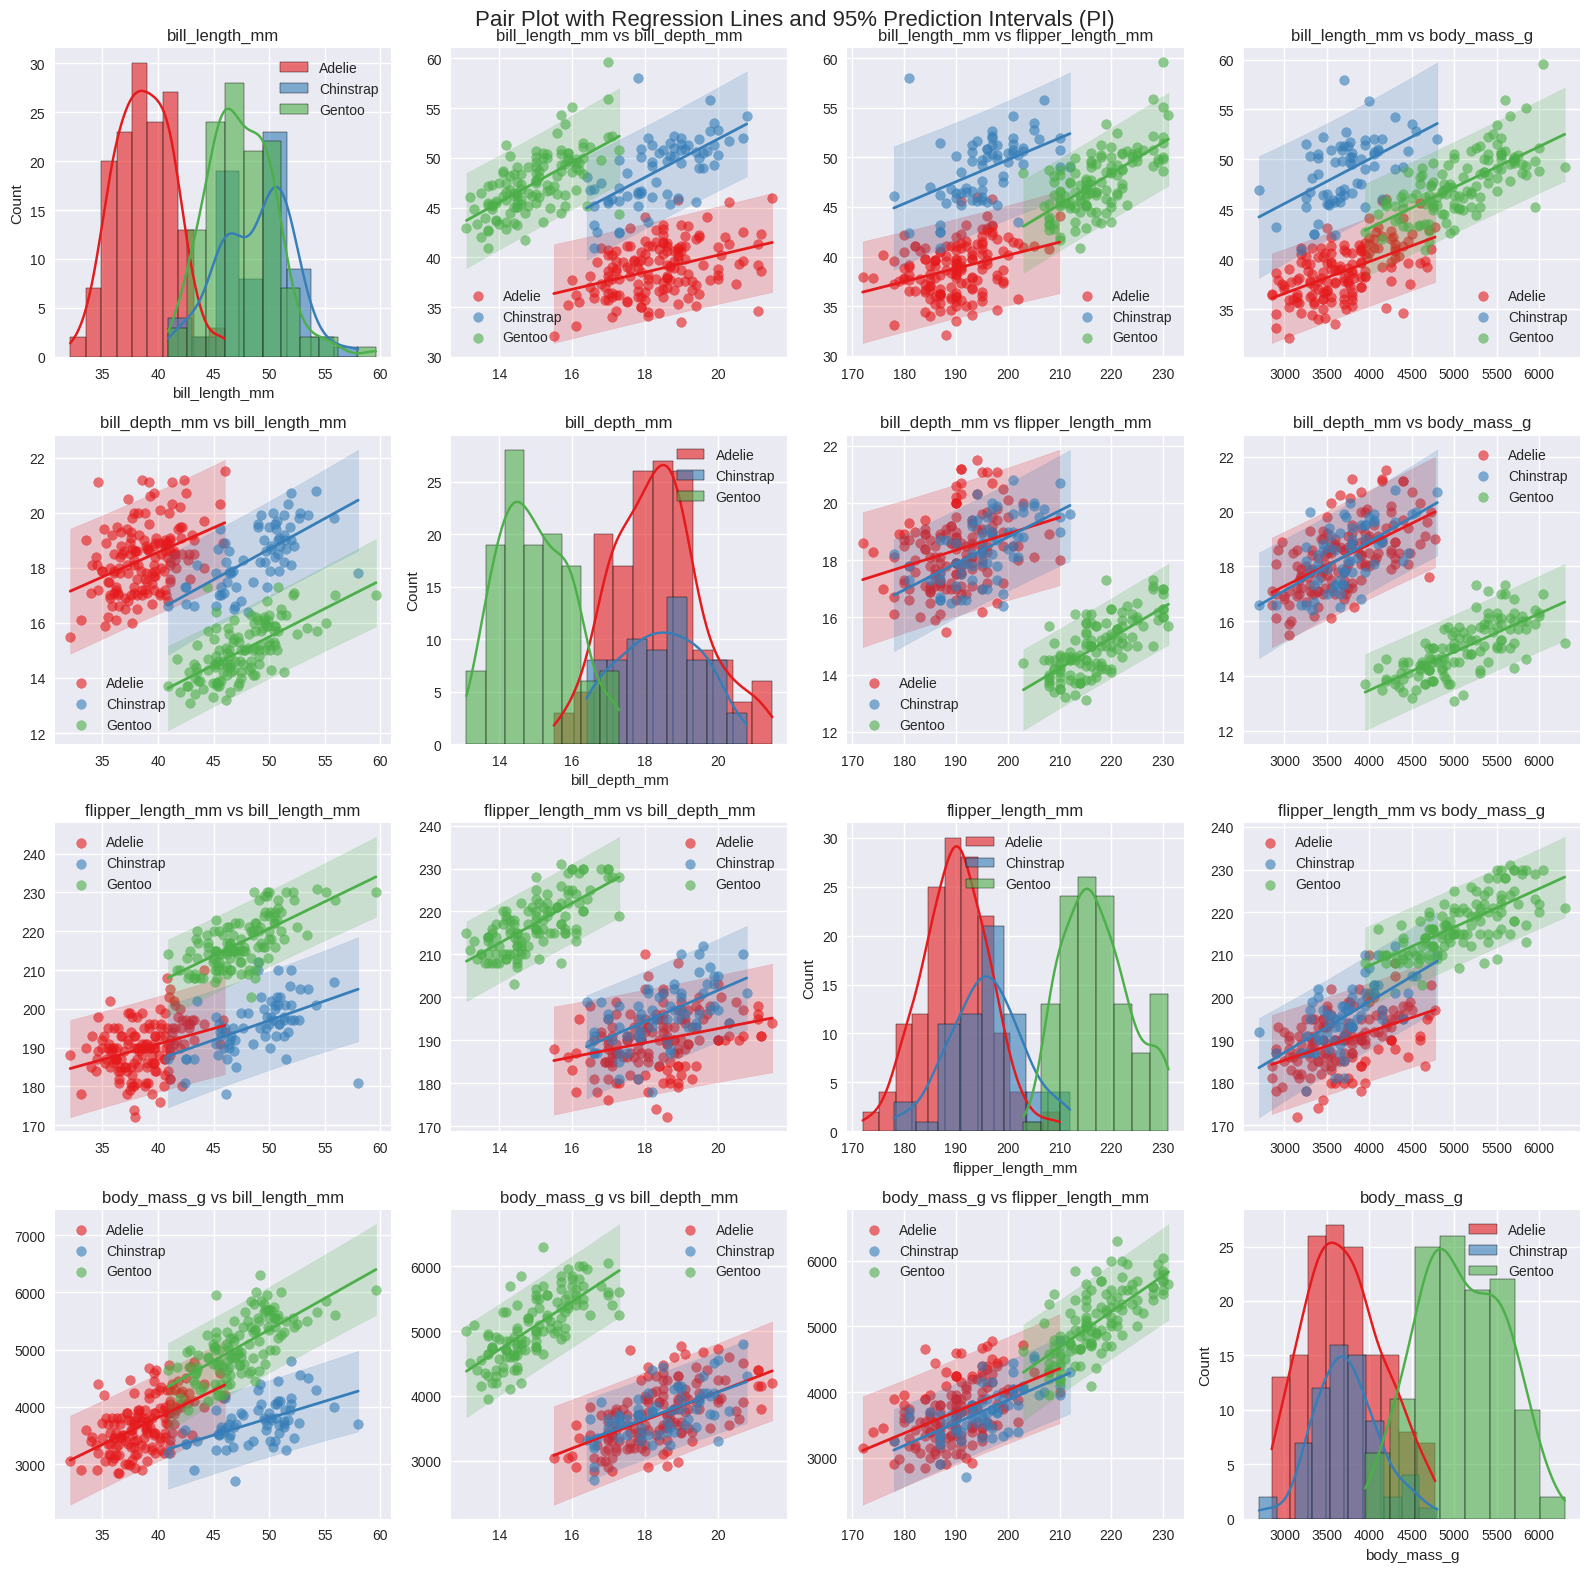

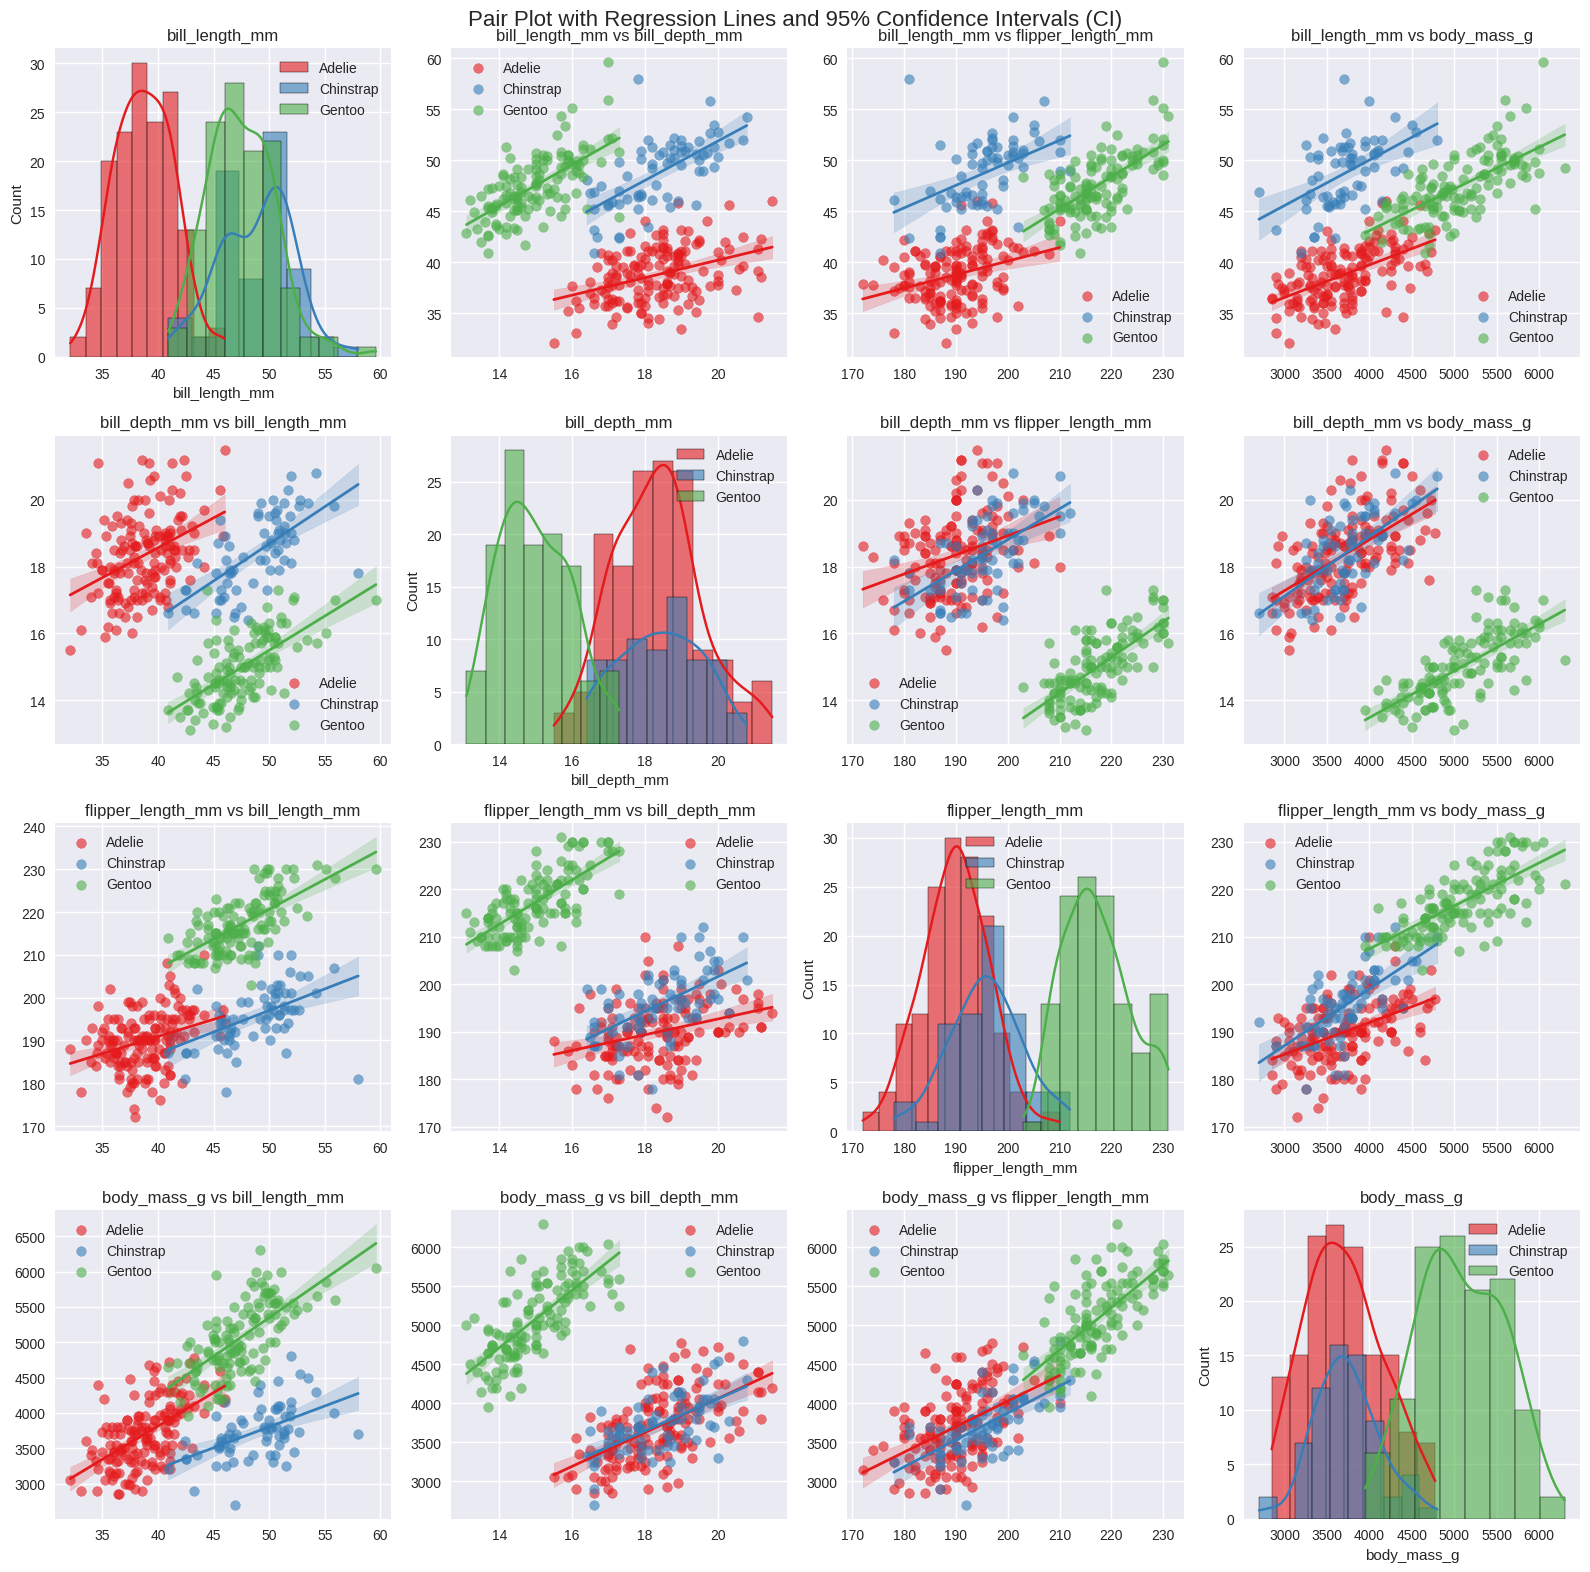

In [21]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def pairplot_with_ci_and_pi_separate(df, features, hue, alpha=0.05):
    n = len(features)
    unique_classes = df[hue].unique()
    palette = sns.color_palette("Set1", len(unique_classes))
    class_colors = dict(zip(unique_classes, palette))

    # === 1. Pair Plot с прогнозными интервалами (PI) ===
    fig1, axes1 = plt.subplots(n, n, figsize=(n * 4, n * 4))
    fig1.suptitle("Pair Plot with Regression Lines and 95% Prediction Intervals (PI)", fontsize=16)

    for i, feat1 in enumerate(features):
        for j, feat2 in enumerate(features):
            ax = axes1[i, j] if n > 1 else axes1[i]

            if i == j:
                # На диагонали — гистограммы или плотности
                for label in unique_classes:
                    subset = df[df[hue] == label]
                    sns.histplot(subset[feat1], ax=ax, label=label, alpha=0.6, kde=True, color=class_colors[label])
                ax.set_title(f'{feat1}')
                ax.legend()
            else:
                for label in unique_classes:
                    subset = df[df[hue] == label]
                    if subset.empty:
                        continue

                    x = subset[feat2].dropna()
                    y = subset[feat1].dropna()
                    combined = pd.concat([x, y], axis=1).dropna()

                    if len(combined) < 2:
                        continue

                    x = combined[feat2]
                    y = combined[feat1]

                    X = add_constant(x)
                    model = OLS(y, X).fit()

                    pred = model.get_prediction(X)
                    pred_summary = pred.summary_frame(alpha=alpha)
                    sorted_idx = np.argsort(x)
                    x_sorted = x.iloc[sorted_idx]
                    pred_summary_sorted = pred_summary.iloc[sorted_idx]

                    color = class_colors[label]

                    ax.scatter(x, y, label=label, alpha=0.6, color=color)
                    ax.plot(x_sorted, pred_summary_sorted['mean'], color=color, linewidth=2)

                    # Прогнозный интервал (PI)
                    ax.fill_between(
                        x_sorted,
                        pred_summary_sorted['obs_ci_lower'],
                        pred_summary_sorted['obs_ci_upper'],
                        alpha=0.2,
                        color=color
                    )

                ax.set_title(f'{feat1} vs {feat2}')
                ax.legend()

    plt.tight_layout()
    plt.show()

    # === 2. Pair Plot с доверительными интервалами (CI) ===
    fig2, axes2 = plt.subplots(n, n, figsize=(n * 4, n * 4))
    fig2.suptitle("Pair Plot with Regression Lines and 95% Confidence Intervals (CI)", fontsize=16)

    for i, feat1 in enumerate(features):
        for j, feat2 in enumerate(features):
            ax = axes2[i, j] if n > 1 else axes2[i]

            if i == j:
                # На диагонали — гистограммы или плотности
                for label in unique_classes:
                    subset = df[df[hue] == label]
                    sns.histplot(subset[feat1], ax=ax, label=label, alpha=0.6, kde=True, color=class_colors[label])
                ax.set_title(f'{feat1}')
                ax.legend()
            else:
                for label in unique_classes:
                    subset = df[df[hue] == label]
                    if subset.empty:
                        continue

                    x = subset[feat2].dropna()
                    y = subset[feat1].dropna()
                    combined = pd.concat([x, y], axis=1).dropna()

                    if len(combined) < 2:
                        continue

                    x = combined[feat2]
                    y = combined[feat1]

                    X = add_constant(x)
                    model = OLS(y, X).fit()

                    pred = model.get_prediction(X)
                    pred_summary = pred.summary_frame(alpha=alpha)
                    sorted_idx = np.argsort(x)
                    x_sorted = x.iloc[sorted_idx]
                    pred_summary_sorted = pred_summary.iloc[sorted_idx]

                    color = class_colors[label]

                    ax.scatter(x, y, label=label, alpha=0.6, color=color)
                    ax.plot(x_sorted, pred_summary_sorted['mean'], color=color, linewidth=2)

                    # Доверительный интервал (CI)
                    ax.fill_between(
                        x_sorted,
                        pred_summary_sorted['mean_ci_lower'],
                        pred_summary_sorted['mean_ci_upper'],
                        alpha=0.2,
                        color=color
                    )

                ax.set_title(f'{feat1} vs {feat2}')
                ax.legend()

    plt.tight_layout()
    plt.show()

# Вызов функции
pairplot_with_ci_and_pi_separate(df_subset, selected_features, 'species')

# 7 formulas

In [22]:
features_name = selected_features  # ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
class_names = selected_species    # ['Adelie', 'Chinstrap', 'Gentoo']

new_index = []
for i, feature1 in enumerate(features_name):
    for j, feature2 in enumerate(features_name):
        if i < j:  # чтобы не дублировать пары
            new_index.append(f"{feature1} and {feature2}")

index = pd.MultiIndex.from_product([class_names, new_index])

linear_regressions_criterions_table = pd.DataFrame(
    index=index,
    columns=["Formula", "df1", "df2", "R^2", "Wald", "Wald_p", "LR", "LR_p", "Score", "Score_p"]
)

for cname in class_names:
    df_class = df_subset[df_subset['species'] == cname]
    for i, feature1 in enumerate(features_name):
        for j, feature2 in enumerate(features_name):
            if i >= j:  # чтобы не дублировать
                continue
            index_str = f"{feature1} and {feature2}"

            X = df_class[feature2]
            Y = df_class[feature1]

            if X.isna().any() or Y.isna().any():
                continue

            X_clean = X.dropna()
            Y_clean = Y[X.index.isin(X_clean.index)].dropna()
            X_clean = X_clean[Y_clean.index]

            if len(X_clean) < 2:
                continue

            X_with_const = add_constant(X_clean)
            model = OLS(Y_clean, X_with_const).fit()

            # Извлекаем параметры
            intercept = model.params['const']
            slope = model.params[feature2]
            r2 = model.rsquared

            # Wald (F-статистика)
            f_stat = model.fvalue
            f_pvalue = model.f_pvalue
            df1 = model.df_model
            df2 = model.df_resid

            # LR (Log-Likelihood Ratio) — вычисляем вручную
            ll_full = model.llf
            null_model = OLS(Y_clean, add_constant(np.ones(len(Y_clean)))).fit()
            ll_null = null_model.llf
            lr_stat = -2 * (ll_null - ll_full)
            lr_pval = 1 - chi2.cdf(lr_stat, df1)

            # Score (Lagrange Multiplier test) — приблизительно через F-статистику
            score_stat = f_stat * df1
            score_pval = 1 - chi2.cdf(score_stat, df1)

            # Заполняем таблицу
            linear_regressions_criterions_table.loc[(cname, index_str), "Formula"] = f"{intercept:.2f} + {slope:.2f}*{feature2}"
            linear_regressions_criterions_table.loc[(cname, index_str), "df1"] = int(df1)
            linear_regressions_criterions_table.loc[(cname, index_str), "df2"] = int(df2)
            linear_regressions_criterions_table.loc[(cname, index_str), "R^2"] = f"{r2:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "Wald"] = f"{f_stat:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "Wald_p"] = f"{f_pvalue:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "LR"] = f"{lr_stat:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "LR_p"] = f"{lr_pval:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "Score"] = f"{score_stat:.3f}"
            linear_regressions_criterions_table.loc[(cname, index_str), "Score_p"] = f"{score_pval:.3f}"

# === Вывод по каждому классу отдельно ===
for cname in class_names:
    print(f"\n--- Класс: {cname} ---")
    print(linear_regressions_criterions_table.loc[cname])


--- Класс: Adelie ---
                                                             Formula df1  df2  \
bill_length_mm and bill_depth_mm          23.07 + 0.86*bill_depth_mm   1  149   
bill_length_mm and flipper_length_mm  13.59 + 0.13*flipper_length_mm   1  149   
bill_length_mm and body_mass_g              26.99 + 0.00*body_mass_g   1  149   
bill_depth_mm and flipper_length_mm    7.47 + 0.06*flipper_length_mm   1  149   
bill_depth_mm and body_mass_g               12.69 + 0.00*body_mass_g   1  149   
flipper_length_mm and body_mass_g          165.24 + 0.01*body_mass_g   1  149   

                                        R^2    Wald Wald_p      LR   LR_p  \
bill_length_mm and bill_depth_mm      0.153  26.970  0.000  25.122  0.000   
bill_length_mm and flipper_length_mm  0.106  17.692  0.000  16.942  0.000   
bill_length_mm and body_mass_g        0.301  64.239  0.000  54.129  0.000   
bill_depth_mm and flipper_length_mm   0.095  15.574  0.000  15.011  0.000   
bill_depth_mm and body_m

ANOVA для признака 'bill_length_mm' (все классы):
F = 410.600, df1 = 2, df2 = 339, p = 0.000

ANOVA (t-тест) для каждой пары классов:
Adelie vs Chinstrap: F = 566.532, df1 = 1, df2 = 217, p = 0.000
Adelie vs Gentoo: F = 629.774, df1 = 1, df2 = 272, p = 0.000
Chinstrap vs Gentoo: F = 7.670, df1 = 1, df2 = 189, p = 0.006


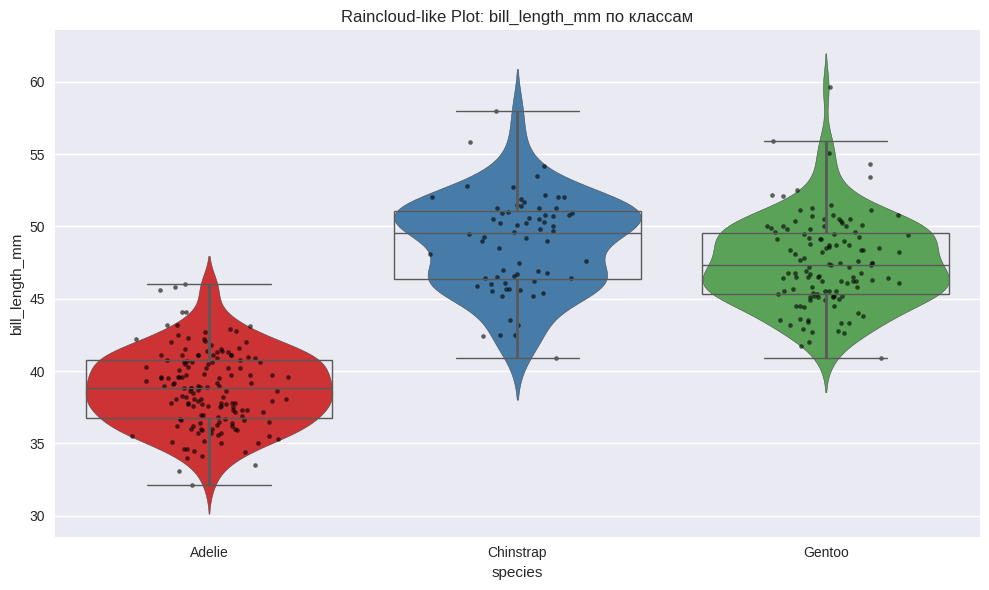

ANOVA для признака 'bill_depth_mm' (все классы):
F = 359.789, df1 = 2, df2 = 339, p = 0.000

ANOVA (t-тест) для каждой пары классов:
Adelie vs Chinstrap: F = 0.182, df1 = 1, df2 = 217, p = 0.670
Adelie vs Gentoo: F = 614.668, df1 = 1, df2 = 272, p = 0.000
Chinstrap vs Gentoo: F = 480.067, df1 = 1, df2 = 189, p = 0.000


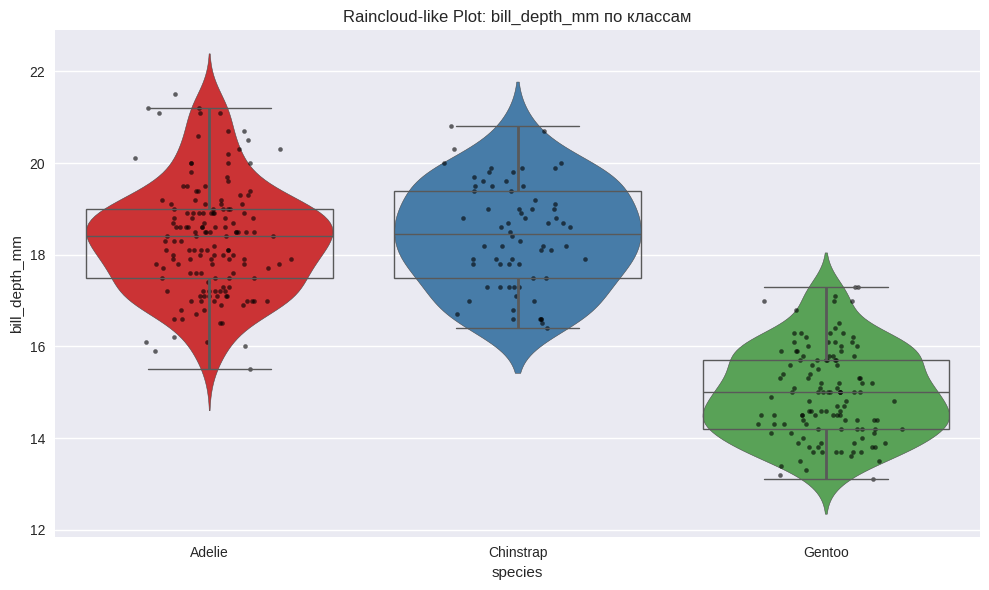

ANOVA для признака 'flipper_length_mm' (все классы):
F = 594.802, df1 = 2, df2 = 339, p = 0.000

ANOVA (t-тест) для каждой пары классов:
Adelie vs Chinstrap: F = 35.689, df1 = 1, df2 = 217, p = 0.000
Adelie vs Gentoo: F = 1184.389, df1 = 1, df2 = 272, p = 0.000
Chinstrap vs Gentoo: F = 442.385, df1 = 1, df2 = 189, p = 0.000


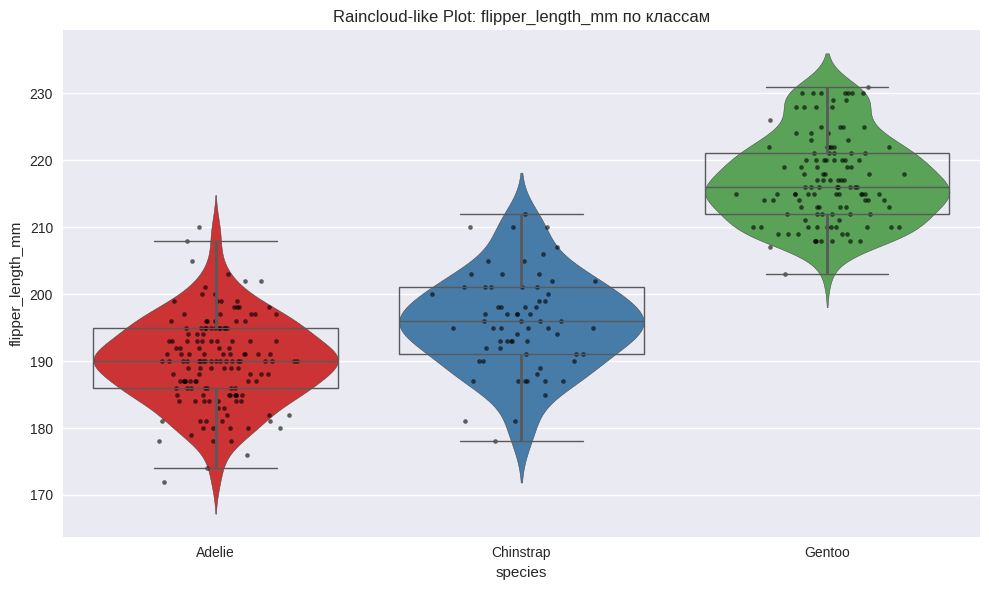

ANOVA для признака 'body_mass_g' (все классы):
F = 343.626, df1 = 2, df2 = 339, p = 0.000

ANOVA (t-тест) для каждой пары классов:
Adelie vs Chinstrap: F = 0.258, df1 = 1, df2 = 217, p = 0.612
Adelie vs Gentoo: F = 557.603, df1 = 1, df2 = 272, p = 0.000
Chinstrap vs Gentoo: F = 364.933, df1 = 1, df2 = 189, p = 0.000


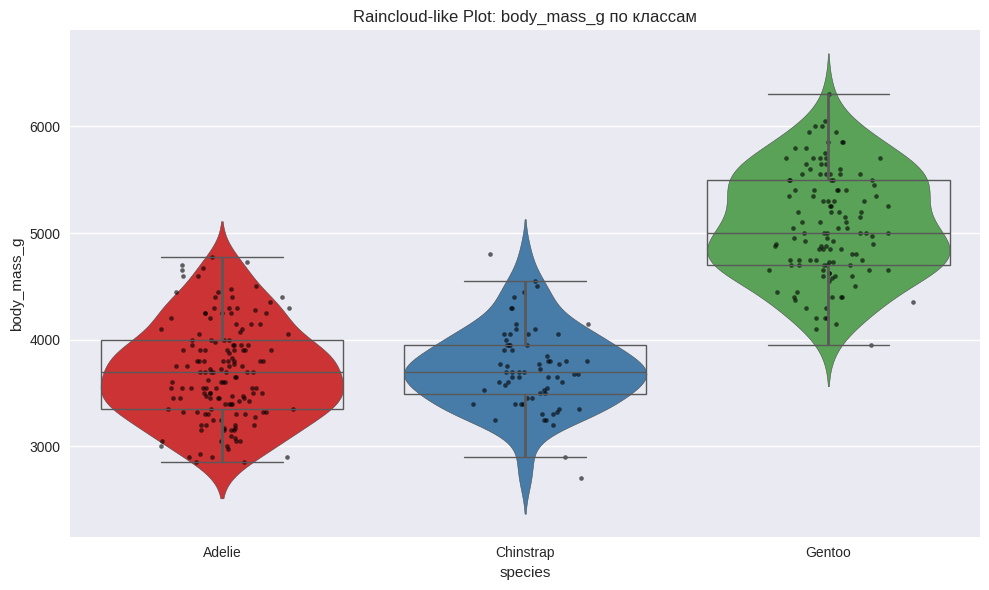

In [23]:
def anova_analysis(df, feature, target_col='species'):
    
    unique_classes = df[target_col].unique()
    
    # === 1. ANOVA для всех классов ===
    groups = [df[df[target_col] == cls][feature].dropna() for cls in unique_classes]
    f_stat_all, p_val_all = f_oneway(*groups)
    df1_all = len(unique_classes) - 1
    df2_all = len(df[feature]) - len(unique_classes)
    
    print(f"ANOVA для признака '{feature}' (все классы):")
    print(f"F = {f_stat_all:.3f}, df1 = {df1_all}, df2 = {df2_all}, p = {p_val_all:.3f}\n")

    # === 2. ANOVA для каждой пары классов  ===
    print("ANOVA (t-тест) для каждой пары классов:")
    for cls1, cls2 in combinations(unique_classes, 2):
        group1 = df[df[target_col] == cls1][feature].dropna()
        group2 = df[df[target_col] == cls2][feature].dropna()

        t_stat, p_val = ttest_ind(group1, group2)
        f_stat_pair = t_stat ** 2
        df1_pair = 1
        df2_pair = len(group1) + len(group2) - 2

        print(f"{cls1} vs {cls2}: F = {f_stat_pair:.3f}, df1 = {df1_pair}, df2 = {df2_pair}, p = {p_val:.3f}")

    # === 3. Визуализация: raincloud plot with jittering ===
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Violin plot
    sns.violinplot(
        data=df, 
        x=target_col, 
        y=feature, 
        hue=target_col,       
        legend=False,          
        ax=ax, 
        palette="Set1", 
        inner=None
    )
    
    # Scatter plot с jittering
    unique_classes = df[target_col].unique()
    for i, cls in enumerate(unique_classes):
        subset = df[df[target_col] == cls][feature].dropna()
        x_jitter = np.random.normal(i, 0.1, size=len(subset))
        ax.scatter(x_jitter, subset, alpha=0.6, s=10, color="black", edgecolors='black', linewidths=0.1)
    
    # Boxplot поверх (медиана, IQR, доверительные интервалы)
    sns.boxplot(
        data=df, 
        x=target_col, 
        y=feature, 
        hue=target_col,        
        legend=False,
        ax=ax, 
        showcaps=True, 
        boxprops={'facecolor': 'none'},
        showfliers=False, 
        whiskerprops={'linewidth': 2}, 
        palette="Set2"
    )
    
    ax.set_title(f'Raincloud-like Plot: {feature} по классам')
    ax.set_xlabel(target_col)
    ax.set_ylabel(feature)
    
    plt.tight_layout()
    plt.show()


numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for feat in numeric_features:
    anova_analysis(df_subset, feat)
